In [1]:
import torch
from torch import nn
import numpy as np
from skimage import io

In [2]:
from torchvision.models import resnet18, resnet50, vgg11

In [3]:
res = resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/sarthak/.torch/models/resnet18-5c106cde.pth
100.0%


In [5]:
res.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [6]:
img = io.imread()

In [10]:
from PIL import Image

In [11]:
img = Image.open("/home/sarthak/college-talk/data/german_shepherd.jpeg")

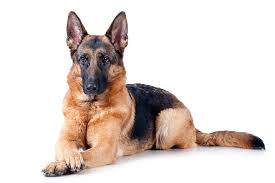

In [12]:
img

In [7]:
from torchvision import transforms`

In [13]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        # transfroms.ToTensor
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [14]:
o = data_transforms['val'](img)

In [15]:
o.size()

torch.Size([3, 224, 224])

In [16]:
o = o.unsqueeze(0)

In [17]:
o.size()

torch.Size([1, 3, 224, 224])

In [18]:
with torch.no_grad():
    x = res(o)

In [19]:
x.size()

torch.Size([1, 1000])

In [21]:
np.argmax(x.data.cpu().numpy(), axis=1)

array([235])

In [22]:
import json

In [24]:
with open("/home/sarthak/list.json", 'r') as fd:
    data = json.load(fd)

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)